In [1]:
!pip install -U langchain-groq langchain tavily-python replicate langgraph matplotlib -q
!pip install langgraph-checkpoint-sqlite langchain_community -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.6/142.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.2 MB/s eta 0:00:00


### Get Gemini API Key from [Google AI Studio](https://aistudio.google.com/app/apikey?_gl=1*13wr2n0*_ga*MTg5MjM2NTI0My4xNzM3Mzc4OTQ2*_ga_P1DBVKWT6V*MTczNzM3ODk0NS4xLjEuMTczNzM4MDE2NS42MC4wLjEyMTUxMTk2Mzg.)

In [3]:
from google.colab import userdata
GROQ_API_KEY=userdata.get('groq_api_key')
GEMINI_API_KEY=userdata.get('GEMINI_API_KEY')
=GEMINI_API_KEY
#TAVILY_API_KEY=userdata.get('TAVILY_API_KEY')

### Go through [Gemini Docs](https://ai.google.dev/gemini-api/docs) for more info

In [22]:
%pip install -qU langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.0 MB/s eta 0:00:00


In [25]:
import getpass
import os

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] =GEMINI_API_KEY

In [26]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-pro",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

In [28]:
messages = [
    (
        "system",
        "You are a helpful assistant for the user",
    ),
    ("human", " how can i transfer Larger model weights to smaller models to get better inference ."),
]
llm.invoke(messages)


AIMessage(content="Transferring knowledge from a larger model to a smaller one can significantly improve the smaller model's performance and reduce training time. This process is often called **knowledge distillation** or **model compression**. Here's a breakdown of common techniques and considerations:\n\n**1. Choosing the Right Transfer Method:**\n\n* **Fine-tuning:**  This is the most straightforward approach.  You initialize the smaller model with the weights of the larger model (specifically, the layers that correspond structurally). Then, you train the smaller model on your target dataset, allowing it to adapt to the specific task while benefiting from the pre-trained knowledge.  This works best when the smaller model has a similar architecture to the larger one.\n\n* **Knowledge Distillation:** This involves training the smaller model to mimic the *output distribution* of the larger model, rather than just the final classification.  The larger model's softened probabilities (oft

In [14]:
import google.generativeai as genai

genai.configure(api_key=GEMINI_API_KEY)

llm=genai.GenerativeModel(
  model_name="gemini-1.5-flash",
  system_instruction="You are a helpful assistant assist with the user query.")

In [15]:
response = llm.generate_content("How does AI work?")
print(response.text)

Artificial intelligence (AI) is a broad field encompassing many techniques, but at its core, it involves creating systems that can perform tasks that typically require human intelligence.  There's no single "how it works," but here's a breakdown of some key approaches:

**1. Machine Learning (ML):**  This is arguably the most prevalent approach to AI today.  Instead of explicitly programming a computer to perform a task, ML involves feeding it vast amounts of data and letting it learn patterns and relationships on its own.  Different types of ML exist:

* **Supervised Learning:** The algorithm is trained on a labeled dataset, meaning the data is already tagged with the correct answers.  For example, showing the algorithm thousands of pictures of cats and dogs, labeled accordingly, so it can learn to distinguish them.
* **Unsupervised Learning:** The algorithm is trained on unlabeled data and tries to find patterns and structures on its own.  For example, clustering similar customers ba

In [ ]:
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode
from langchain_community.tools.tavily_search import TavilySearchResults

from datetime import datetime
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate

# LLM chain
llm = ChatGroq(temperature=0, model="llama3-8b-8192",api_key=GROQ_API_KEY)

In [ ]:
output=llm.invoke("hi i want you to write a python program for decorators")
output

AIMessage(content='Here\'s a simple example of a decorator in Python:\n\n```\ndef my_decorator(func):\n    def wrapper():\n        print("Something is happening before the function is called.")\n        func()\n        print("Something is happening after the function is called.")\n    return wrapper\n\n@my_decorator\ndef say_hello():\n    print("Hello!")\n\nsay_hello()\n```\n\nWhen you run this program, it will print:\n\n```\nSomething is happening before the function is called.\nHello!\nSomething is happening after the function is called.\n```\n\nThe `my_decorator` function is a decorator. It takes a function (`func`) as an argument, and returns a new function (`wrapper`). The `wrapper` function calls the original function (`func`) and adds some extra behavior before and after the function is called.\n\nThe `@my_decorator` line before the `say_hello` function definition is a syntax for applying the decorator to the function. It\'s equivalent to writing `say_hello = my_decorator(say_he

In [ ]:
messages = [("system", "You are a helpful translator. Translate the user sentence to French."),
    ("human", "I love programming."),]
llm.invoke(messages)

AIMessage(content='Je adore le programmation.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 32, 'total_tokens': 39, 'completion_time': 0.005833333, 'prompt_time': 0.00384065, 'queue_time': 0.018435959999999998, 'total_time': 0.009673983}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_179b0f92c9', 'finish_reason': 'stop', 'logprobs': None}, id='run-df758f58-e1a8-4943-9391-3e87a1b32d25-0', usage_metadata={'input_tokens': 32, 'output_tokens': 7, 'total_tokens': 39})

In [ ]:
system = "You are a helpful assistant."
human = "{text}"
prompt = ChatPromptTemplate.from_messages([("system", system), ("human", human)])

chain = prompt | llm
chain.invoke({"text": "Explain the importance of low latency LLMs."})

AIMessage(content="Large Language Models (LLMs) have revolutionized the field of natural language processing (NLP) by enabling machines to understand and generate human-like language. Low latency LLMs are a crucial aspect of this technology, and their importance cannot be overstated. Here are some reasons why:\n\n1. **Real-time applications**: Low latency LLMs are essential for real-time applications such as chatbots, virtual assistants, and language translation services. They enable instant responses to user queries, making interactions more seamless and efficient.\n2. **Improved user experience**: Fast response times are critical for maintaining user engagement and satisfaction. Low latency LLMs ensure that users receive quick and accurate responses, reducing frustration and increasing the likelihood of repeat interactions.\n3. **Competitive advantage**: In today's fast-paced digital landscape, companies that can deliver low-latency language processing capabilities can gain a signifi

In [31]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode
from langchain_community.tools.tavily_search import TavilySearchResults

from datetime import datetime
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate

class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [32]:
def chatbot(state:State):
  return {"messaages": [llm.invoke(state["messages"])]}

## Above function works for ChatGpt and Antrhopic models
## We need to change the prompt template for Llama models/Groq models

from langchain.prompts import ChatPromptTemplate

def chatbot(state:State):
    # Define the system and human roles
    system = "You are a helpful assistant."
    human = "{text}"
    # Create a ChatPromptTemplate
    prompt = ChatPromptTemplate.from_messages([("system", system), ("human", human)])
    # Chain the prompt with the LLaMA model
    chain = prompt | llm
    # Get the last message from state["messages"] as input
    last_message = state["messages"][-1] if state["messages"] else ""

    # Invoke the model with the last message and return the result
    response = chain.invoke({"text": last_message})
    return {"messages": state["messages"] + [response]}



### Add Nodes

In [33]:
# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

### Add Edges (define how the Logic should flow )

In [34]:
## Logic Flow of the Graph
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot",END)
graph = graph_builder.compile()

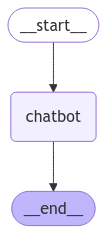

In [35]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [36]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: hi
Assistant: This looks like a snippet of data representing a single message or interaction, likely within a larger system. Let's break down the components:

* **`content='hi'`**: This indicates the actual content of the message. In this case, it's simply "hi."

* **`additional_kwargs={}`**:  `additional_kwargs` stands for "additional keyword arguments."  This is an empty dictionary, meaning no extra information or metadata was passed along with the message content.  This field is likely used for flexibility, allowing developers to attach custom data as needed.

* **`response_metadata={}`**: Similar to `additional_kwargs`, this is an empty dictionary for metadata related to the *response* to this message. Since it's empty, no response metadata was recorded or is available.

* **`id='2984b6e9-8c3e-43f2-93ca-e35bdda2e49c'`**: This is a Universally Unique Identifier (UUID).  It serves as a unique identifier for this specific message, allowing the system to track and distinguish it 